# Stock Sentiment Analysis using News Headlines

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


# Load Data

In [23]:
# Load dataset
data_path = '/content/Stock Headlines.csv'
df = pd.read_csv(data_path, encoding="ISO-8859-1")


# Data PreProcessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [25]:
df.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


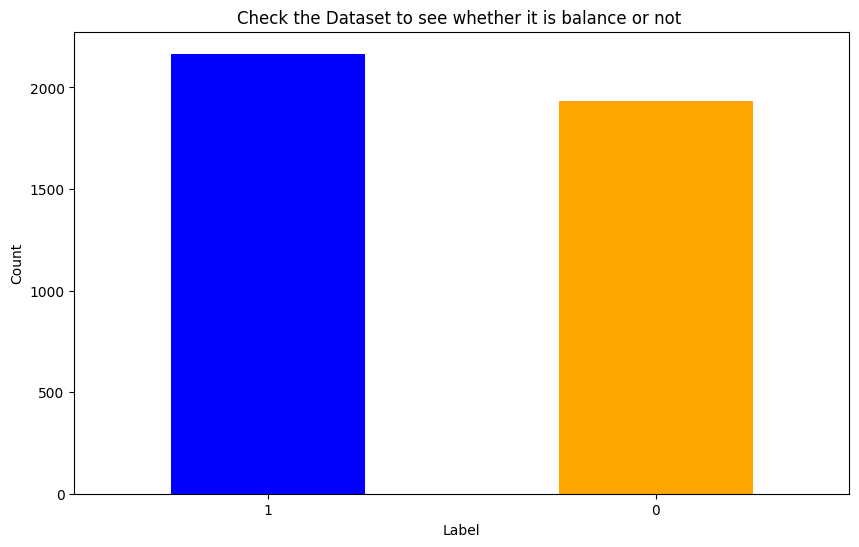

In [28]:
# Count the values
label_counts = df['Label'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Check the Dataset to see whether it is balance or not ')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

In [29]:
# Split data into training and testing sets
train_data = df[df['Date'] < '20150101']
test_data = df[df['Date'] > '20141231']

In [30]:
# Preprocessing training data by removing punctuations
train_headlines = train_data.iloc[:, 2:27].replace("[^a-zA-Z]", " ", regex=True)
test_headlines = test_data.iloc[:, 2:27].replace("[^a-zA-Z]", " ", regex=True)

In [31]:
# Renaming column names for ease of access
column_names = [str(i) for i in range(25)]
train_headlines.columns = column_names
test_headlines.columns = column_names

In [46]:
# Convert headlines to lowercase and fill NaNs with empty strings
train_headlines = train_headlines.apply(lambda x: x.str.lower()).fillna("")
test_headlines = test_headlines.apply(lambda x: x.str.lower()).fillna("")
# Combine headlines into a single string for each row
train_headlines_combined = [' '.join(row) for row in train_headlines.values]
test_headlines_combined = [' '.join(row) for row in test_headlines.values]
# Labels
train_labels = train['Label']
test_labels = test['Label']

# Create Bag of Words with n-gram range (2, 2)
count_vectorizer = CountVectorizer(ngram_range=(2, 2))
train_bow = count_vectorizer.fit_transform(train_headlines_combined)
test_bow = count_vectorizer.transform(test_headlines_combined)

In [47]:
print(train_labels.shape)
print(test_labels.shape)
print(train_bow.shape)
print(test_bow.shape)

(3975,)
(378,)
(3975, 584285)
(378, 584285)


In [54]:
# Function to train and evaluate RandomForest model
def train_and_evaluate_model(train_features, test_features, train_labels, test_labels):
    # Initialize the RandomForestClassifier with the best parameters
    random_forest_model = RandomForestClassifier(
        n_estimators=200,
        criterion='gini',
        max_features='log2'
    )

    # Train the model
    random_forest_model.fit(train_features, train_labels)

    # Predict on the test set
    predictions = random_forest_model.predict(test_features)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(test_labels, predictions)
    accuracy = accuracy_score(test_labels, predictions)
    classification_rep = classification_report(test_labels, predictions)

    return conf_matrix, accuracy, classification_rep

# Train and evaluate the model using the Bag of Words features
conf_matrix, accuracy, classification_rep = train_and_evaluate_model(train_bow, test_bow, train_labels, test_labels)

# Print the results
print(f"Accuracy Score: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy Score: 0.8518518518518519
Confusion Matrix:
 [[130  56]
 [  0 192]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [55]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Function to train and evaluate Binary Perceptron model
def train_and_evaluate_model(train_features, test_features, train_labels, test_labels):
    # Initialize the Perceptron
    perceptron_model = Perceptron(
        max_iter=2000
    )

    # Train the model
    perceptron_model.fit(train_features, train_labels)

    # Predict on the test set
    predictions = perceptron_model.predict(test_features)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(test_labels, predictions)
    accuracy = accuracy_score(test_labels, predictions)
    classification_rep = classification_report(test_labels, predictions)

    return conf_matrix, accuracy, classification_rep

# Train and evaluate the model using the Bag of Words features
conf_matrix, accuracy, classification_rep = train_and_evaluate_model(train_bow, test_bow, train_labels, test_labels)

# Print the results
print(f"Accuracy Score: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Accuracy Score: 0.8518518518518519
Confusion Matrix:
 [[157  29]
 [ 27 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       186
           1       0.85      0.86      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378

